**PROJECT BY : TEHREEM ZUBAIR**

> www.linkedin.com/in/tehreem-zubair-367005236


# **MEDICAL INSURANCE PREMIUM PREDICTION WITH MACHINE LEARNING**#

# **INTRODUCTION**

---

The goal of the project is to develop a model that can accurately predict the medical costs incurred by individuals based on these features. The output to be predicted is the "charges," which represents the individual medical costs billed by health insurance.

In summary, the task is to build a predictive model that estimates the health insurance charges for individuals based on their age, gender, BMI, number of children, smoking habits, and geographic location (region).

# **TASK #1:** UNDERSTAND THE PROBLEM STATEMENT

The objective of project is to predict the health insurance cost incurred ny individuals based on their age, gender, BMI, number of children, smoking habit and geo-location.

### **The available features are:**

**1. Sex:** Insurance contractor gender

**2. BMI:** Body mass index(ideally 18.5 to 24.9)

**3. Children:** Numberof children covered by health insurance/ number of dependents

**4. Smoker:** Smoking

**5. Region:** The beneficiary resident area in US(typically divided into northwest,southeast, southwest)

### **Target(output):**

**Charges:** Individual medical costs billed by health insurance

# **TASK #2:** IMPORT LIBRARIES AND DATASETS
To begin working on the problem statement and building a predictive model, you'll need to import the necessary libraries and load the dataset. You can use Python and popular libraries for data analysis and machine learning, such as NumPy, Pandas, and Scikit-Learn.


In [ ]:
!pip install jupyterthemes

---
Setting the style of the notebook to be monokai theme
this line of code is important to ensure that we are able to see the x and y axes clearly

If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them.


---



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)
#



---


 Read the csv file

---



In [ ]:

insurance_df = pd.read_csv('/insurance.csv')

In [ ]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# **TASK 3:** PERFORM EXPLORATORY DATA ANALYSIS - PART 1

Exploratory Data Analysis (EDA) is an important step in understanding your
dataset and gaining insights into the data. In this task, we'll perform the first part of EDA, which includes basic data exploration, summary statistics, and visualizations.


---
The Pandas DataFrame provides a convenient method called `.isnull()` to help you detect missing values.

As we have no True value that means we have nomissing value.

In [ ]:
insurance_df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


<Axes: >

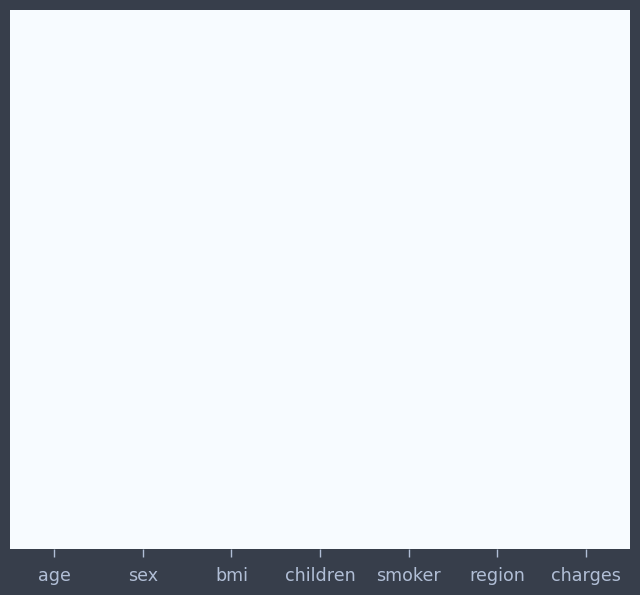

In [ ]:
# check if there are any Null values through heatmap
sns.heatmap(insurance_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")




---


We can also check null values through the sum function as th esum value for each feature is 0 that means there is no null value.


---



In [ ]:
# check if there are any Null values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# Check the dataframe info
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


To gain a comprehensive understanding of your dataset, we can use describe function to get the values of statistical functions such as mean, standard deviation, variance etc.


In [ ]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Grouping by region to see any relationship between region and charges
# Seems like south east region has the highest charges and body mass index
df_region = insurance_df.groupby(by = 'region').mean()
df_region

<ipython-input-162-4260e238e3e3>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_region = insurance_df.groupby(by = 'region').mean()


,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


**PRACTICE OPPORTUNITY #1 [OPTIONAL]:**
- **Group data by 'age' and examine the relationship between 'age' and 'charges'**


In [ ]:
df_age = insurance_df.groupby(by = 'age').mean()
df_age

<ipython-input-163-580dc6a49340>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_age = insurance_df.groupby(by = 'age').mean()


,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802
23,31.454464,1.000000,12419.820040
24,29.142679,0.464286,10648.015962
25,29.693929,1.285714,9838.365311
26,29.428929,1.071429,6133.825309


# **TASK 4:** PERFORM FEATURE ENGINEERING

Feature engineering is an important step in the data preprocessing phase, where you create new features or transform existing ones to improve the performance of your machine learning models. In this task, we'll perform feature engineering on the insurance dataset.

---



In [ ]:
# Check unique values in the 'sex' column
insurance_df['sex'].unique()

array(['female', 'male'], dtype=object)



---


As we got two unique values in sex column so we categorize these values by giving female 0 and male as 1.

---



In [ ]:
# convert categorical variable to numerical
insurance_df['sex']=insurance_df['sex'].apply(lambda x: 0 if x == 'female' else 1)

In [ ]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


---

Do the same process with smoer column

---



In [ ]:
# Check the unique values in the 'smoker' column
insurance_df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
# Convert categorical variable to numerical
insurance_df['smoker'] = insurance_df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

In [ ]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520




---


In categorizing the 'region' we use getdummies function
1. It takes the 'region' column from the DataFrame 'insurance_df'.

2. It creates binary (0 or 1) dummy variables for each unique category in the 'region' column.

3. The purpose of these dummy variables is to represent the presence or absence of a specific category. For each row, only one of the dummy variables will have a value of 1, indicating the category it represents, while the others will be 0.


---



In [ ]:
# Check unique values in 'region' column
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
region_dummies = pd.get_dummies(insurance_df['region'], drop_first = True)


In [ ]:
region_dummies

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [ ]:
insurance_df = pd.concat([insurance_df, region_dummies], axis = 1)

### **FINALIZED DATASET**

In [ ]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0


In [ ]:
# Let's drop the original 'region' column
insurance_df.drop(['region'], axis = 1, inplace = True)


In [ ]:
insurance_df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


# **TASK 5:** PERFORM DATA VISUALIZATION

Create histograms for specific columns, By examining these histograms, you can gain an initial understanding of the data's distribution, identify any anomalies, and make informed decisions about further data analysis and modeling strategies.

---




array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

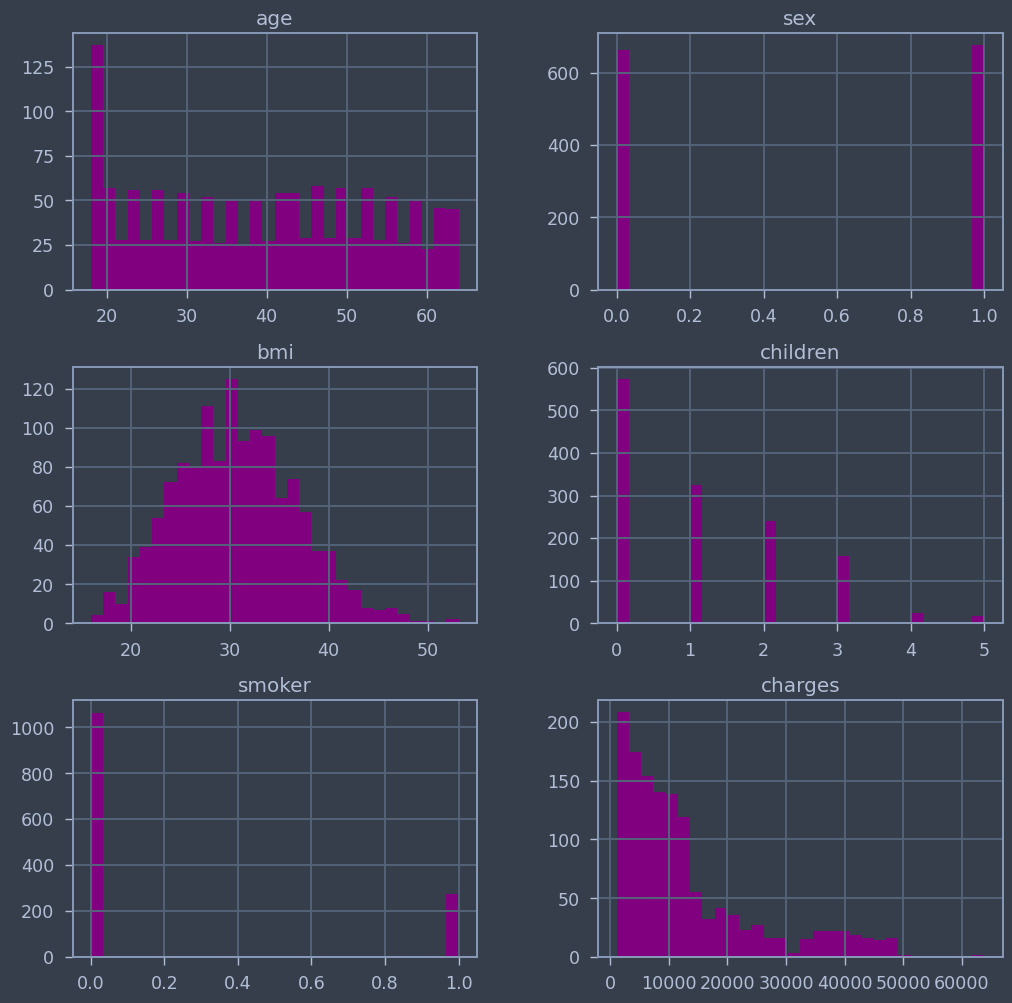

In [ ]:
insurance_df[['age', 'sex', 'bmi','children','smoker','charges'] ].hist(bins=30, figsize = (12,12), color=['purple'])

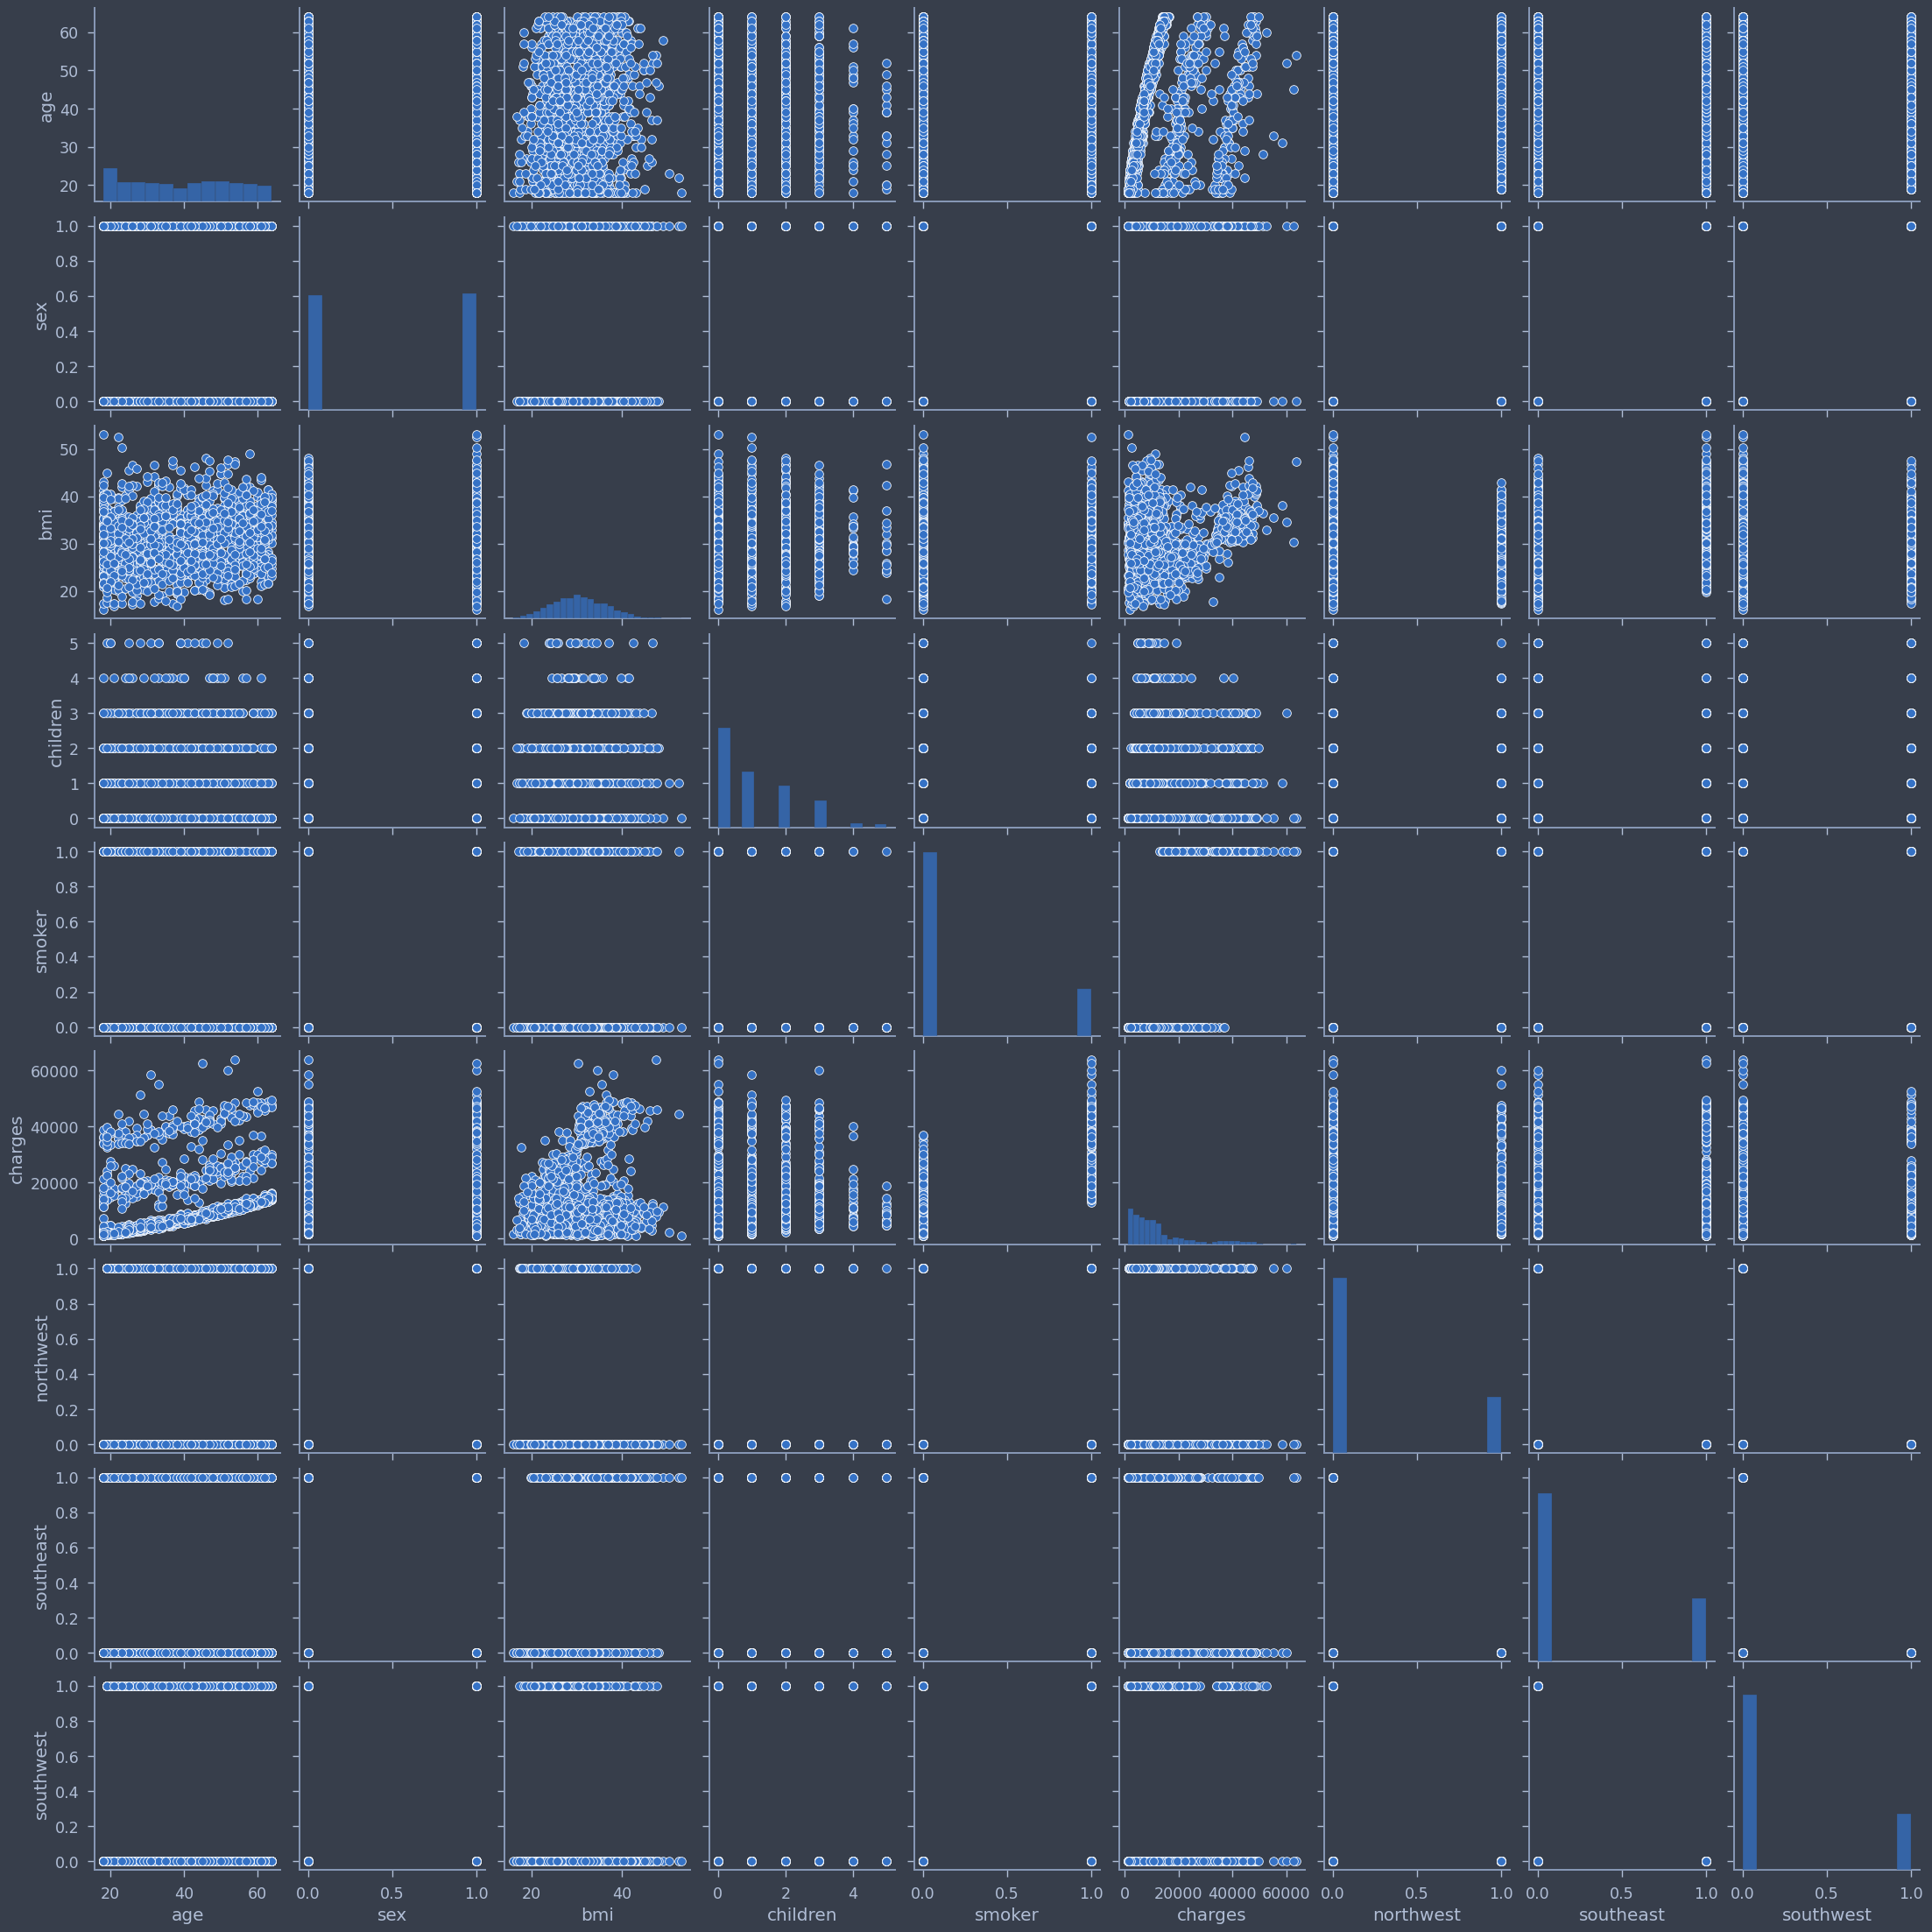

In [ ]:
# plot pairplot
sns.pairplot(insurance_df)

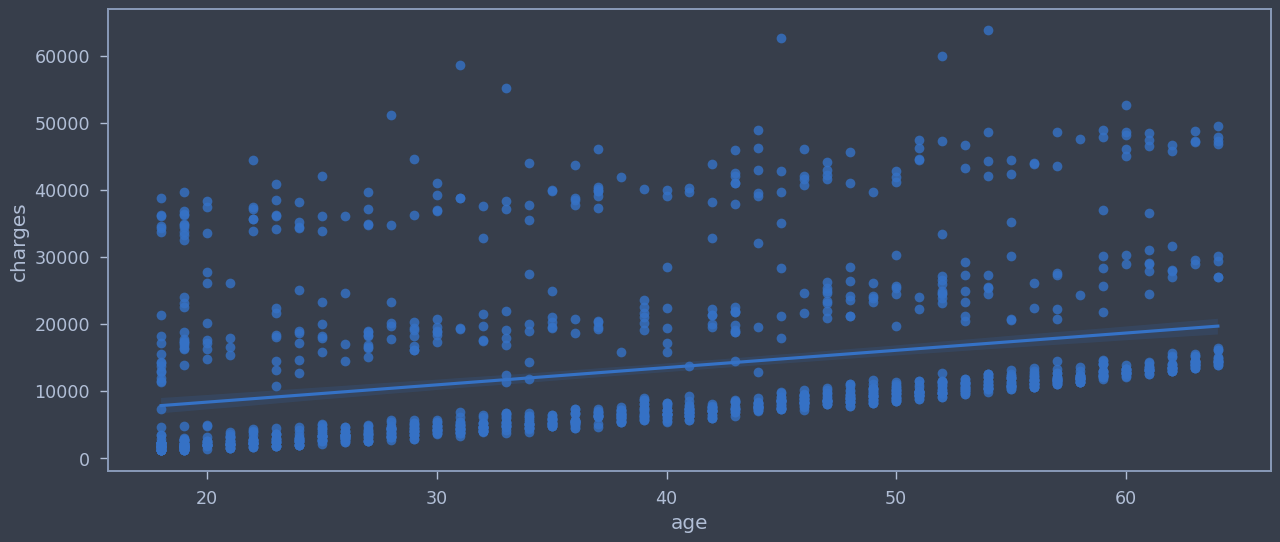

In [ ]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'age', y = 'charges', data = insurance_df)
plt.show()


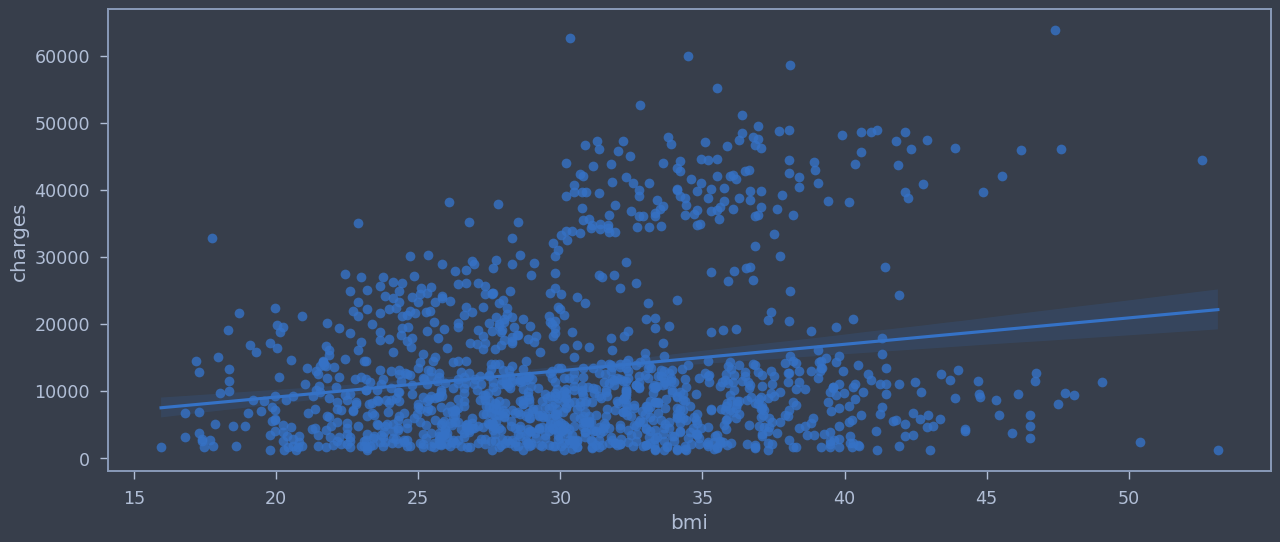

In [ ]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df)
plt.show()


**PRACTICE OPPORTUNITY #2 [OPTIONAL]:**
 - **Calculate and plot the correlation matrix**
 - **Which feature has the most positive correlation with charges?**

In [ ]:
insurance_df.corr()


,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000




---


Determine the relationship between different features.

---



<Axes: >

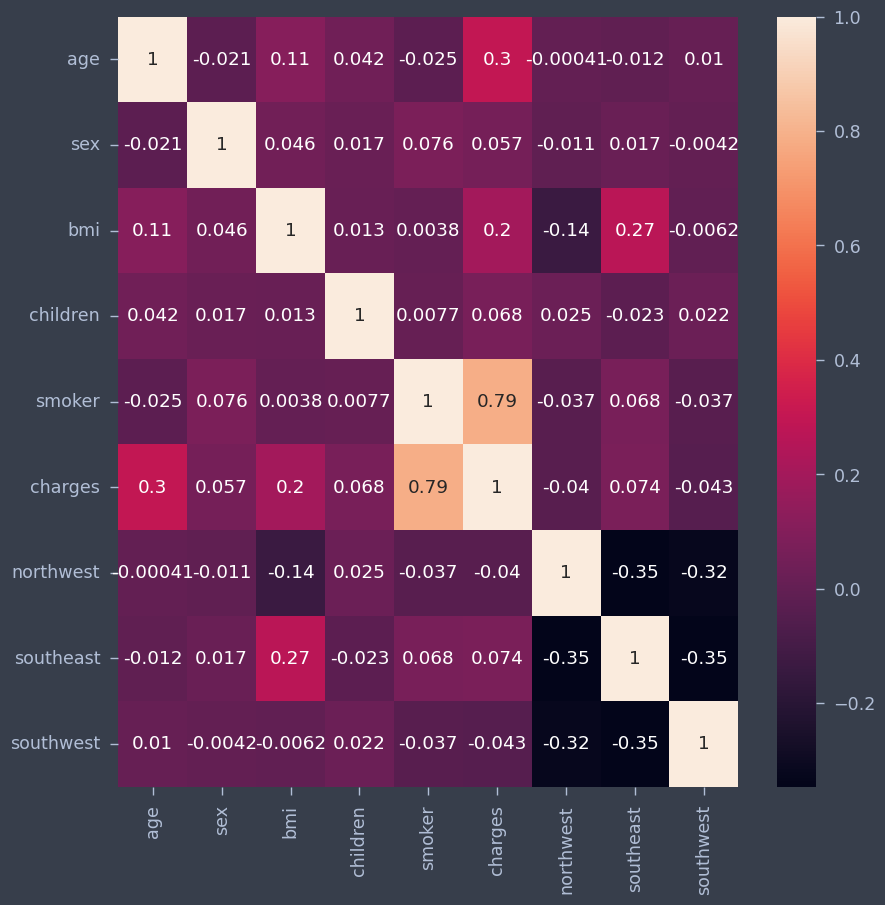

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(insurance_df.corr(),annot=True)

# TASK #6: CREATE TRAINING AND TESTING DATASET



---



*   The primary purpose of this step is to ensure that the model performs well on data it hasn't seen before, avoiding overfitting, which occurs when a model is too closely tailored to the training data and cannot generalize effectively.

*   To create the training and testing datasets, we'll typically split the data into two parts, allocating a certain percentage (e.g., 70-80%) to the training set and the remaining portion to the testing set. This can be done using various methods, such as random sampling or stratified sampling, depending on the specific requirements and characteristics of the data.
*   Once the datasets are created, we can proceed to model training and evaluation using the training and testing datasets, respectively.







---



In [ ]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

By splitting the data into features (X) and the target (y), we're organizing the data in a way that's conducive to machine learning model training. The features will serve as input variables for your model, and the target will be used to evaluate the model's performance. This separation is fundamental for building and assessing predictive models as it clarifies what we want to predict and what we'll use for prediction.


In [ ]:
X = insurance_df.drop(columns = ['charges'])
y = insurance_df['charges']

In [ ]:
X

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0,0
1334,18,0,31.920,0,0,0,0,0
1335,18,0,36.850,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,1


In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
X.shape

(1338, 8)

In [ ]:
y.shape

(1338,)

In [ ]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')



---


Adjust the shape of the target variable 'y' to make it compatible with machine learning models and their requirements.


---



In [ ]:
y = y.reshape(-1,1)

In [ ]:
# Only take the numerical variables and scale them
X

array([[-1.4387642 , -1.0105187 , -0.45332006, ..., -0.5664179 ,
        -0.61132365,  1.765481  ],
       [-1.5099654 ,  0.9895908 ,  0.5096212 , ..., -0.5664179 ,
         1.6357946 , -0.5664179 ],
       [-0.79795355,  0.9895908 ,  0.38330686, ..., -0.5664179 ,
         1.6357946 , -0.5664179 ],
       ...,
       [-1.5099654 , -1.0105187 ,  1.0148778 , ..., -0.5664179 ,
         1.6357946 , -0.5664179 ],
       [-1.2963619 , -1.0105187 , -0.79781353, ..., -0.5664179 ,
        -0.61132365,  1.765481  ],
       [ 1.5516857 , -1.0105187 , -0.261388  , ...,  1.765481  ,
        -0.61132365, -0.5664179 ]], dtype=float32)

In [ ]:
y.shape

(1338, 1)

In [ ]:
#scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)


**PRACTICE OPPORTUNITY #3 [OPTIONAL]:**
- **Split the data into 20% Testing and 80% Training**
- **Double check that the split was successful by getting the shape of both the training and testing datasets**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 10)

print(X_train.shape)
print(X_test.shape)

(1070, 8)
(268, 8)


# TASK #7: TRAIN AND EVALUATE A LINEAR REGRESSION MODEL IN SCIKIT-LEARN


*   In this section, we will use Scikit-Learn, a powerful Python library for machine learning, to build and assess a Linear Regression model. The objective is to predict individual medical costs (charges) based on the features (predictor variables) from the 'insurance_df' dataset.


*   By the end of this section, we will have trained a Linear Regression model and assessed its predictive capabilities. The results will provide valuable insights into the model's accuracy and how well it generalizes to new, unseen data.

---



In this section, a Linear Regression model is trained using Scikit-Learn, a popular Python machine learning library. Here are the key steps involved:


*  **Model Selection**: We have selected the Linear Regression model from Scikit-Learn by importing it using `from sklearn.linear_model import LinearRegression`.

*  **Model Initialization**: The model is initialized by creating an instance of the `LinearRegression` class, which is named `regression_model_sklearn`. This instance will be used to train and make predictions.

*  **Model Training**: The `fit()` method is used to train the model. The training data, represented by `X_train` (features) and `y_train` (target), is provided to the model. The Linear Regression model learns to estimate the coefficients for each feature and the intercept term based on this training data.



In [ ]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regression_model_sklearn = LinearRegression()
regression_model_sklearn.fit(X_train, y_train)



LinearRegression()

In [ ]:
regresssion_model_sklearn_accuracy = regression_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.6953286766126094

In [ ]:
y_predict = regression_model_sklearn.predict(X_test)

In [ ]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)


In [ ]:
k = X_test.shape[1]
n = len(X_test)
n

268

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt


RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 6536.847 
MSE = 42730370.0 
MAE = 4555.099 
R2 = 0.6953286931374412 
Adjusted R2 = 0.6859179964003737


# TASK #8: TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK-BASED REGRESSION MODEL

# Train and Evaluate an Artificial Neural Network (ANN)-based Regression Model

In this section, we will delve into the world of deep learning by training and evaluating an Artificial Neural Network (ANN)-based regression model. ANNs are particularly useful when dealing with complex patterns and non-linear relationships in data.

Here's an overview of the steps we will follow:

1. **Data Preparation**: We have already split our data into training and testing sets (X_train, y_train, X_test, and y_test), which we will use for model training and evaluation.

2. **Model Creation**: We will create an ANN-based regression model. In this case, we will be using a deep learning library like TensorFlow or Keras to build the model architecture.

3. **Model Training**: The ANN model will be trained on the training data (X_train and y_train). During training, the model will adjust its internal weights to minimize the difference between its predictions and the actual target values.

4. **Model Evaluation**: After training, we will use the testing dataset (X_test) to evaluate the model's performance. Common regression evaluation metrics like Mean Squared Error (MSE) and R-squared (R2) will be used to assess the model's predictive accuracy.

6. **Visualization**: Depending on the complexity of the model, we may create visualizations to understand how well the model's predictions align with the actual target values.

By the end of this section, we will have trained and evaluated an ANN-based regression model, providing insights into its predictive capabilities and its ability to capture complex relationships in the data.


---



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [ ]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 8))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 50)                450       
                                                                 
 activation_8 (Activation)   (None, 50)                0         
                                                                 
 dense_11 (Dense)            (None, 150)               7650      
                                                                 
 activation_9 (Activation)   (None, 150)               0         
                                                                 
 dropout_2 (Dropout)         (None, 150)               0         
                                                                 
 dense_12 (Dense)            (None, 150)               22650     
                                                                 
 activation_10 (Activation)  (None, 150)              

In [ ]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
43/43 [==============================] - 2s 9ms/step - loss: 0.7005 - val_loss: 0.2434
Epoch 2/100
43/43 [==============================] - 0s 5ms/step - loss: 0.3279 - val_loss: 0.1895
Epoch 3/100
43/43 [==============================] - 0s 4ms/step - loss: 0.2892 - val_loss: 0.2210
Epoch 4/100
43/43 [==============================] - 0s 6ms/step - loss: 0.2601 - val_loss: 0.1840
Epoch 5/100
43/43 [==============================] - 0s 5ms/step - loss: 0.2459 - val_loss: 0.1818
Epoch 6/100
43/43 [==============================] - 0s 4ms/step - loss: 0.2273 - val_loss: 0.2235
Epoch 7/100
43/43 [==============================] - 0s 6ms/step - loss: 0.2200 - val_loss: 0.2049
Epoch 8/100
43/43 [==============================] - 0s 5ms/step - loss: 0.2290 - val_loss: 0.2011
Epoch 9/100
43/43 [==============================] - 0s 4ms/step - loss: 0.2098 - val_loss: 0.2022
Epoch 10/100
43/43 [==============================] - 0s 4ms/step - loss: 0.2225 - val_loss: 0.1853
Epoch 11/

In [ ]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

9/9 [==============================] - 0s 5ms/step - loss: 0.2146
Accuracy : 0.7853738516569138


In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

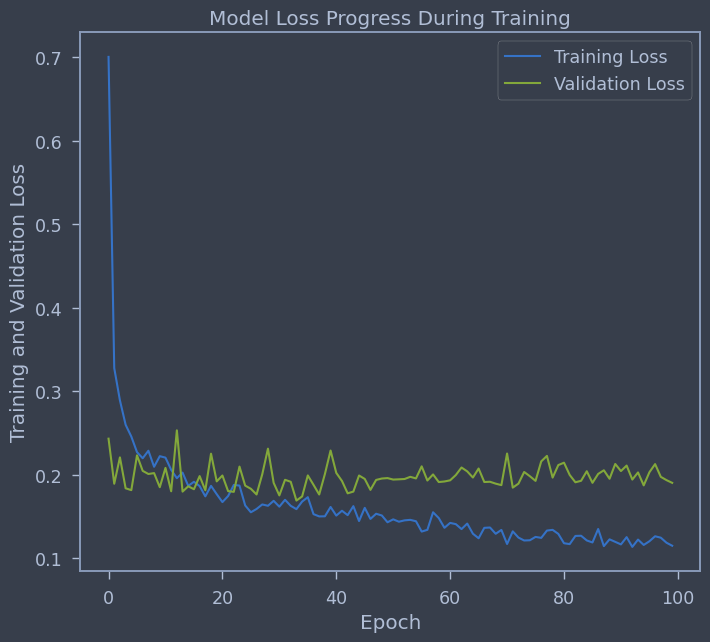

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

9/9 [==============================] - 0s 4ms/step


Text(0, 0.5, 'True Values')

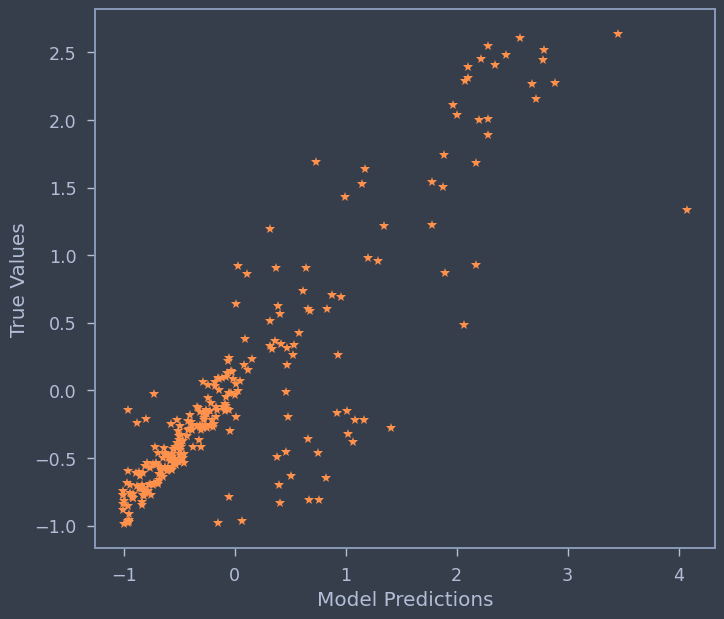

In [ ]:
y_predict = ANN_model.predict(X_test)
plt.plot(y_test, y_predict, "*", color = 'y')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [ ]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

Text(0, 0.5, 'True Values')

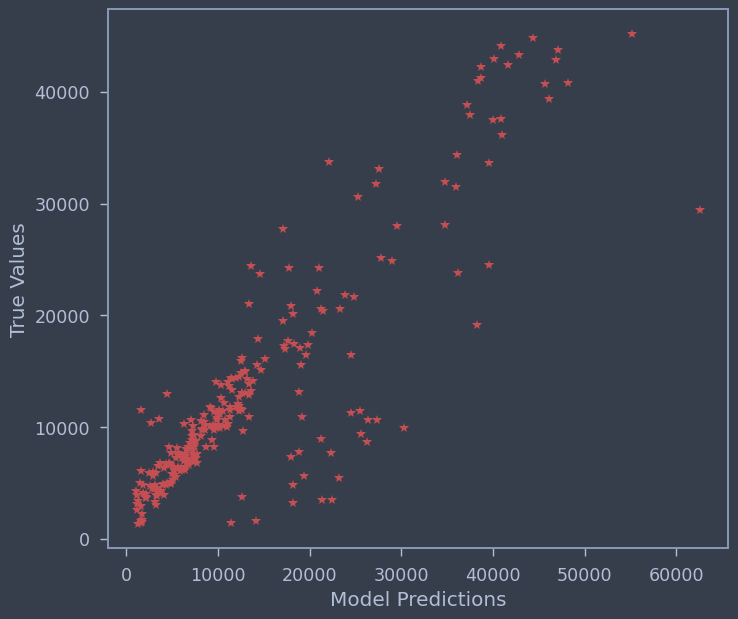

In [ ]:
plt.plot(y_test_orig, y_predict_orig, "*", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [ ]:
k = X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 5608.201 
MSE = 31451914.0 
MAE = 3245.346 
R2 = 0.7757450571906261 
Adjusted R2 = 0.7688182635903367


# **CONCLUSION:**
The objective of this project was to develop predictive models that could accurately estimate medical insurance charges, which have significant implications for healthcare cost analysis and insurance pricing. Both the Linear Regression and ANN-based models have their unique strengths and limitations, and their performance was evaluated based on well-established regression evaluation metrics.


In summary, "Medical Insurance Premium Prediction with Machine Learning" demonstrated the application of data science and machine learning techniques to address a real-world problem. The project showcased the importance of data preprocessing, model selection, and evaluation in the context of healthcare and insurance. The knowledge and skills gained from this project can be extended to various predictive modeling tasks, making data-driven decision-making more accessible and impactful.